## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.metrics import plot_confusion_matrix as plt_conf
from sklearn.model_selection import train_test_split as trn
import matplotlib.pyplot as plt

## Reading data

In [2]:
df = pd.read_csv("./datasets/drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


## Label encoding

In [3]:
sex_le = le()
bp_le = le()
chol_le = le()

sex_labels = sex_le.fit_transform(df.Sex)
bp_labels = bp_le.fit_transform(df.BP)
chol_labels = chol_le.fit_transform(df.Cholesterol)

In [4]:
print(sex_labels[0:10])
print(bp_labels[0:10])
print(chol_labels[0:10])

[0 1 1 0 0 0 0 1 1 1]
[0 1 1 2 1 2 2 1 2 1]
[0 0 0 0 0 0 0 0 0 1]


In [5]:
df = df.drop("Sex", axis="columns")
df = df.drop("BP", axis="columns")
df = df.drop("Cholesterol", axis="columns")

In [6]:
df['sex'] = sex_labels
df['bp'] = bp_labels
df['chol'] = chol_labels
df.head(10)

,Age,Na_to_K,Drug,sex,bp,chol
0,23,25.355,DrugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,DrugY,0,1,0
5,22,8.607,drugX,0,2,0
6,49,16.275,DrugY,0,2,0
7,41,11.037,drugC,1,1,0
8,60,15.171,DrugY,1,2,0
9,43,19.368,DrugY,1,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      200 non-null    int64  
 1   Na_to_K  200 non-null    float64
 2   Drug     200 non-null    object 
 3   sex      200 non-null    int64  
 4   bp       200 non-null    int64  
 5   chol     200 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


## Train test split

In [8]:
x = np.array(df[["Age","Na_to_K","sex","bp","chol"]], ndmin=2)
y = np.array(df[["Drug"]])

In [9]:
train_x, test_x, train_y, test_y = trn(x, y, test_size = 0.3, random_state = 3)

## Making of model

In [10]:
tree = dtree(criterion="entropy", max_depth=4)
tree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Evaluation

In [11]:
print("Accuracy score : %.4f" %acc(test_y, tree.predict(test_x)))

Accuracy score : 0.9833


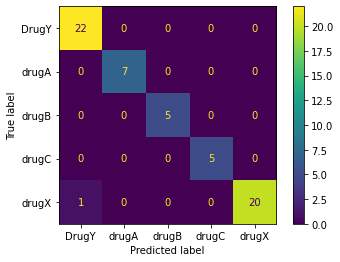

In [12]:
plt_conf(tree, test_x, test_y)
plt.show()